In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datasets import ModelNetDataset
from tiny.utils import plot_point_cloud

In [3]:
dataset = ModelNetDataset(root="./data/modelnet10", augment_prob=0.5)

In [22]:
i = 500
dataset[i]

{'mesh': './data/modelnet10/off/bed/train/bed_0364.off',
 'label': 1,
 'prompt': '3d render of bed',
 'low_res': array([[ 50.58238156,  47.        ,   6.81875289],
        [-14.64210824, -44.7958427 , -15.        ],
        [  8.        ,  -7.6436617 , -18.51496273],
        ...,
        [ 16.10706583, -28.29350899, -26.        ],
        [-20.71811456,  10.80575228, -27.        ],
        [ 16.64707123,   7.15259861, -27.        ]]),
 'high_res': array([[-25.2390121 , -28.61077172, -27.        ],
        [-55.        ,  34.70262281,  -7.19389081],
        [-50.        , -33.35172551, -22.95936024],
        ...,
        [-22.90011477,  37.44923942, -12.        ],
        [  7.        , -30.89951076, -17.64460177],
        [-13.08976232,  47.        , -17.30927669]])}

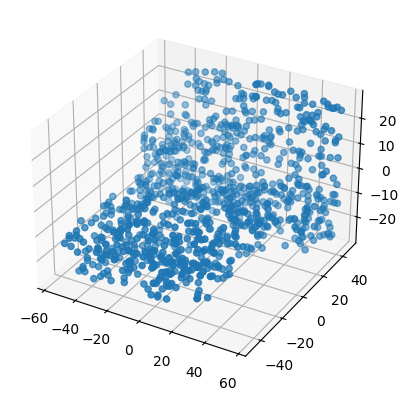

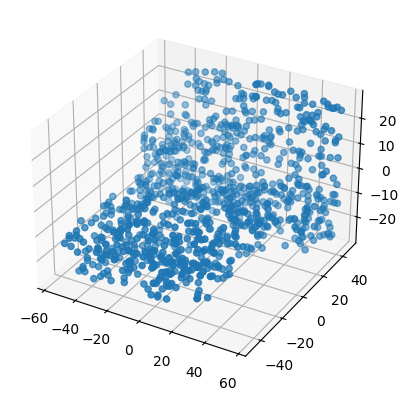

In [23]:
plot_point_cloud(dataset[i]["low_res"])

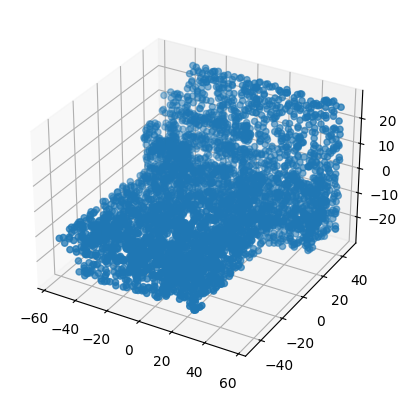

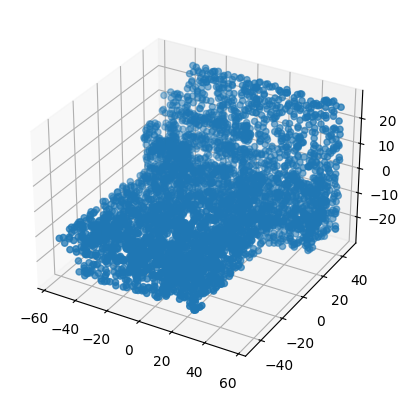

In [24]:
plot_point_cloud(dataset[i]["high_res"])

In [25]:
import open3d as o3d
import numpy as np
import trimesh

In [30]:
data = dataset[i]["high_res"]

In [31]:
import pyvista as pv


In [32]:
cloud = pv.PolyData(data)
volume = cloud.delaunay_3d(alpha=2.)
shell = volume.extract_geometry()

vertices = shell.points
faces = shell.faces.reshape(-1, 4)[:, 1:]  # PyVista stores faces as [n, i, j, k], hence the slicing

trimesh_mesh = trimesh.Trimesh(vertices=vertices, faces=faces)
trimesh_mesh.show()

2024-05-12 19:29:10.136 ( 291.985s) [    14B3D678B740]      vtkDelaunay3D.cxx:513   WARN| vtkDelaunay3D (0x55c0906285f0): 55 degenerate triangles encountered, mesh quality suspect


In [33]:
shell.save('output_shell.ply')